In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from collections import Counter
import pandas
plt.rcParams['font.sans-serif'] = ['SimHei'] 

In [56]:
X1, y1=datasets.make_circles(n_samples=1000, factor=.6,
                                      noise=.05)
X2, y2 = datasets.make_blobs(n_samples=300, n_features=2, 
                             centers=[[1.2,1.2],[-1.23,-1],[-1.5,2],[2,-1.5]],
                             cluster_std=[[.1],[.1],[.1],[.1]],
               random_state=9)

X = np.concatenate((X1, X2))

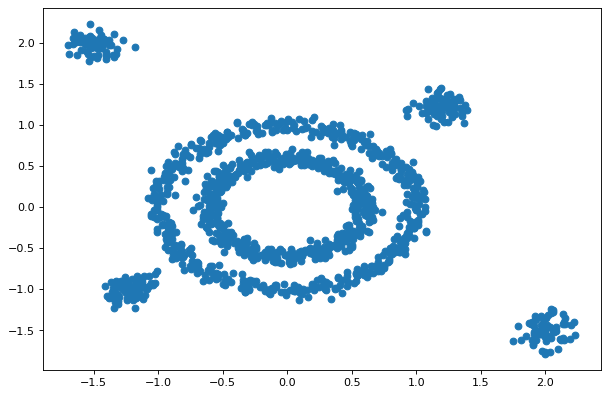

In [57]:
plt.figure(figsize=(9,6), dpi=80)
plt.scatter(X[:, 0], X[:, 1], marker='o')

In [94]:
v = np.array([ndt[k] for k in ndt])

In [97]:
np.std(v)

89.67444548386962

In [99]:
dbscan= DBSCAN(eps = 0.02 * 4, min_samples = 10)
y_pred = dbscan.fit_predict(X)

# outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
# stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})

# plt.title(f"eps={0.02*8}")
# plt.scatter(X[:, 0], X[:, 1], c=y_pred)

D:\workspace\ArcGIS\bin\Python\envs\ProDev\lib\site-packages\numpy\core\fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
D:\workspace\ArcGIS\bin\Python\envs\ProDev\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
D:\workspace\ArcGIS\bin\Python\envs\ProDev\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\workspace\ArcGIS\bin\Python\envs\ProDev\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)


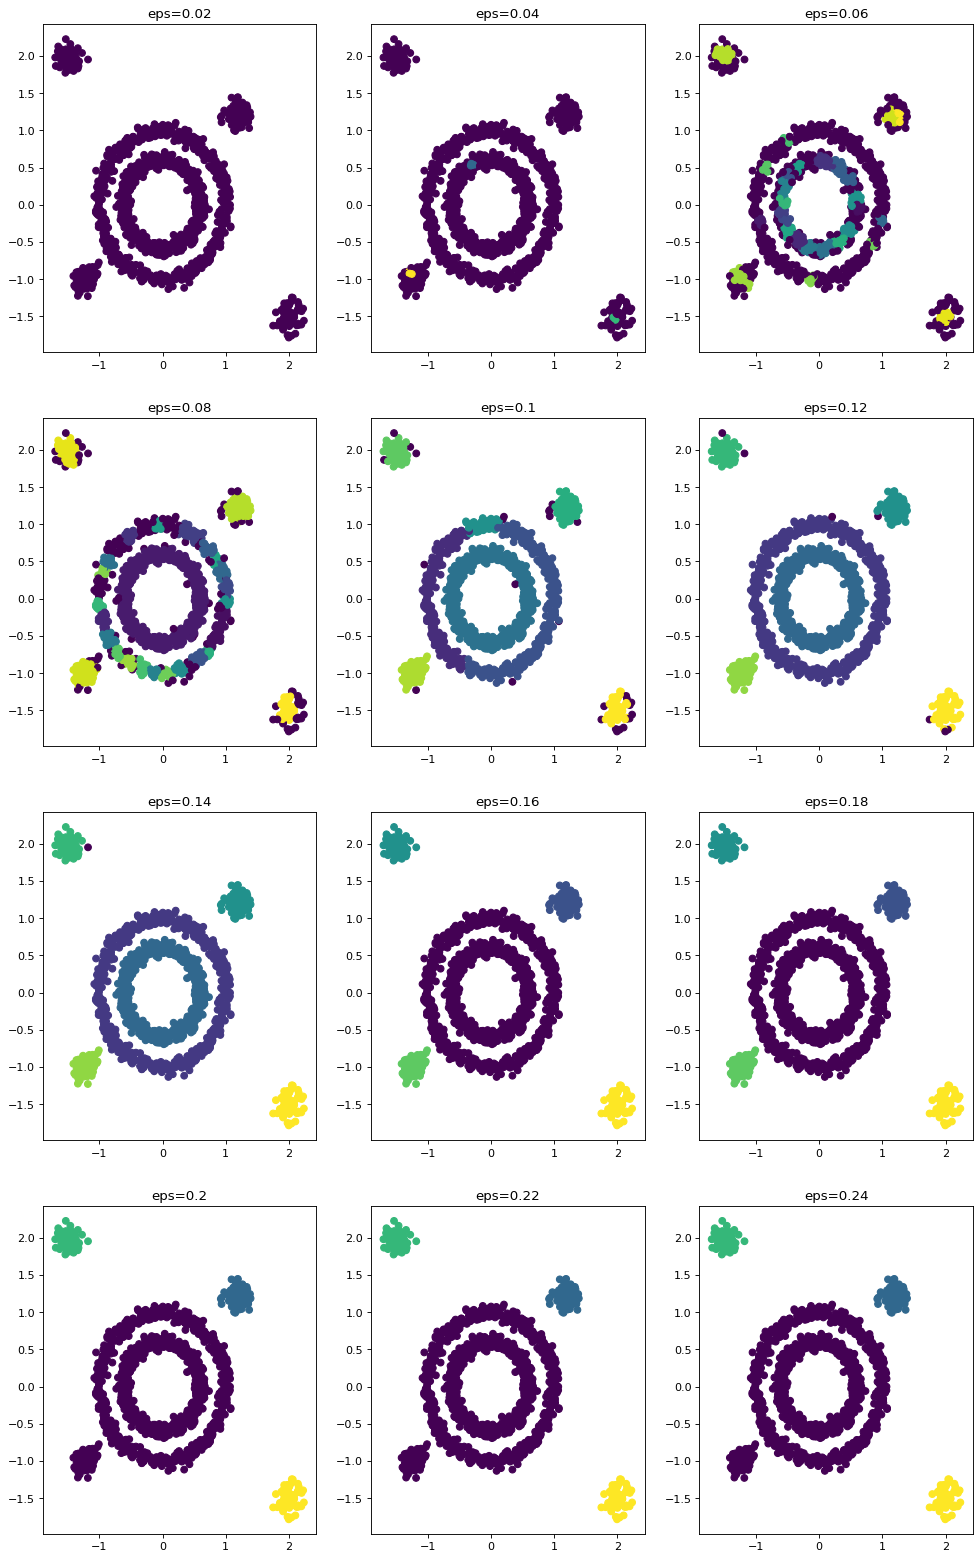

In [106]:
plt.figure(figsize=(15,25), dpi=80)
pd = []
for i in range(1,13):  
    plt.figure(1)
    ax1 = plt.subplot(4,3,i)
    dbscan= DBSCAN(eps = 0.02 * i, min_samples = 10)
    y_pred = dbscan.fit_predict(X)
    nclass = dbscan.labels_
    ndt = Counter(nclass)
    allndt = ndt.copy()
    del ndt[-1]
    n_clusters = len(ndt)
    outliners= allndt[-1]
    v = np.array([ndt[k] for k in ndt])
    var = np.var(v)
    std = np.std(v)
    pd.append({"eps":0.02*i,"分类数量":n_clusters,
              "离群值数量":outliners,"方差":var,"标准差":std})
    
    plt.title(f"eps={0.02*i}")
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [108]:
df = pandas.DataFrame(pd)

In [109]:
df

eps  分类数量  离群值数量             方差         标准差
0   0.02     0   1300            NaN         NaN
1   0.04     3   1270       0.000000    0.000000
2   0.06    27    712     128.098765   11.318073
3   0.08    27    187    8041.506173   89.674445
4   0.10     8     30   21870.437500  147.886570
5   0.12     6      8   40376.888889  200.940013
6   0.14     6      1   40186.250000  200.465084
7   0.16     5      0  136900.000000  370.000000
8   0.18     5      0  136900.000000  370.000000
9   0.20     4      0  187500.000000  433.012702
10  0.22     4      0  187500.000000  433.012702
11  0.24     4      0  187500.000000  433.012702

<AxesSubplot:xlabel='eps'>

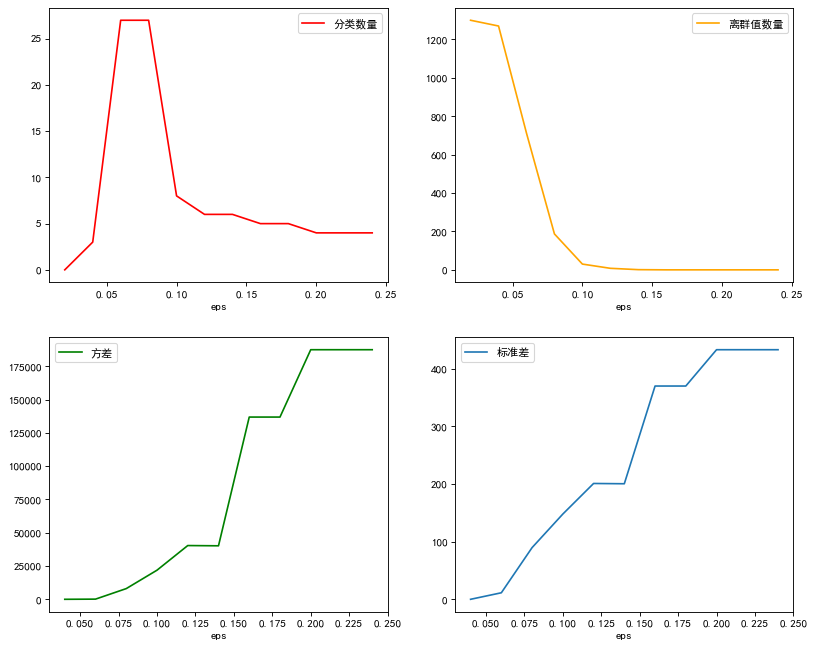

In [126]:
plt.figure(figsize=(12,10), dpi=80)
ax = plt.subplot(2,2,1)
df.plot(ax = ax,x= "eps",y = "分类数量",color="red")
ax = plt.subplot(2,2,2)
df.plot(ax = ax,x= "eps",y = "离群值数量",color="orange")
ax = plt.subplot(2,2,3)
df.plot(ax = ax,x= "eps",y = "方差",color="green")
ax = plt.subplot(2,2,4)
df.plot(ax = ax,x= "eps",y = "标准差")

<AxesSubplot:xlabel='eps'>

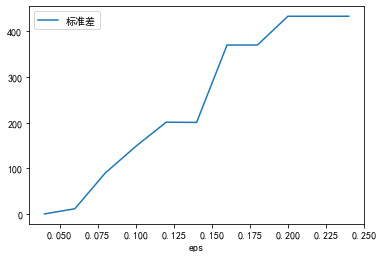

In [115]:
df.plot(x= "eps",y = "标准差")

<AxesSubplot:xlabel='eps'>

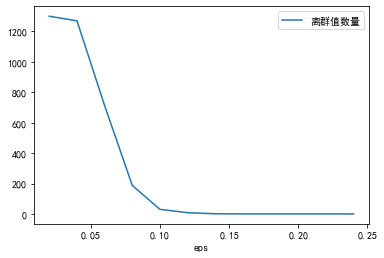

In [117]:
df.plot(x= "eps",y = "离群值数量")